<a href="https://colab.research.google.com/github/AryanshVasu/YOLO5-crater-detection/blob/main/yolo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
from google.colab import files

drive.mount('/content/drive',force_remount=True)



Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab\ Notebooks/crater_detection
!pwd

/content/drive/MyDrive/Colab Notebooks/crater_detection
/content/drive/MyDrive/Colab Notebooks/crater_detection


In [4]:
!git clone https://github.com/ultralytics/yolov5.git #clone repo
%cd /content/drive/MyDrive/Colab\ Notebooks/crater_detection/yolov5/yolov5
%pip install -r requirements.txt #install dependencies
%pip install -q comet_ml
%pip uninstall wandb -
%cd ..


fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/drive/MyDrive/Colab Notebooks/crater_detection/yolov5/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 M

In [12]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import torch
from ultralytics import YOLO
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import comet_ml
import yaml


comet_ml.init(project_name='lunar crater detection')

COMET WARNING: comet_ml.init() is deprecated and will be removed soon. Please use comet_ml.login()


In [18]:
def setLr(Lr0,Lrf=0.1):
  with open('data/hyps/hyp.scratch-high2.yaml','r') as f:
    hyp = yaml.load(f, Loader=yaml.SafeLoader)
  hyp['lr0'] = Lr0
  hyp['lrf'] = Lrf

  with open('data/hyps/hyp.scratch-high2.yaml','w') as f:
    yaml.dump(hyp,f)

setLr(0.0001,0.01)

In [21]:
modelList = os.listdir('./crater_detetection')
model = modelList[-1]
modelpath = 'crater_detetection/' + model + '/weights/best.pt'
print (modelpath)

Name = model.split('.')
Name[1] = str(int(Name[1])+1)
Name = Name[0]+"."+Name[1]
print (Name)
# !ls

crater_detetection/model_0.5/weights/best.pt
model_0.6


In [19]:
modelList = os.listdir('./crater_detetection')
model = modelList[-1]
modelpath = 'crater_detetection/' + model + '/weights/best.pt'
print (f"Last model path: {modelpath}")

Name = model.split('.')
Name[1] = str(int(Name[1])+1)
Name = Name[0]+"."+Name[1]
print (f'Model name : {Name} \n')
!python train.py --img 416 --epochs 30 --batch 110 --data ../datasets/data.yaml --weights {modelpath} --device 0 --project crater_detetection --name {Name} --cache ram --hyp data/hyps/hyp.scratch-high2.yaml

Last model path: crater_detetection/model_0.4/weights/best.pt
Model name : model_0.5 

2025-05-18 19:14:56.583908: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747595696.605392   22431 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747595696.611540   22431 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=crater_detetection/model_0.4/weights/best.pt, cfg=, data=../datasets/data.yaml, hyp=data/hyps/hyp.scratch-high2.yaml, epochs=30, batch_size=110, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_wei

In [13]:
class crater_dataset(Dataset):
  def __init__(self,train_test,root,transform):
    self.path = root+train_test+'/'
    self.images = os.list(self.path+'images/')
    self.labels = os.list(self.path+'labels/')
    self.transform = transform


  def __len__(self):
    return len(self.images)

  def __getitem__(self,idx):
    label = self.labels[idx]
    img = Image.open(self.images[idx])




In [ ]:
def show_im(im_name):
  path = './train/'
  img = Image.open(path+'images/'+im_name+'.jpg')
  img_size = img.size[0]
  label = open(path+'labels/'+im_name+'.txt','r').read()
  labels = label.split('\n')

  fig,ax = plt.subplots()
  ax.imshow(img)
  for l in labels:
    rect = [float(n)*img_size for n in l[2:].split()]
    rect = [rect[0]-rect[2]/2,rect[1]-rect[3]/2,rect[2],rect[3]]
    pch = patches.Rectangle((rect[0],rect[1]),rect[2],rect[3],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(pch)
  plt.show()

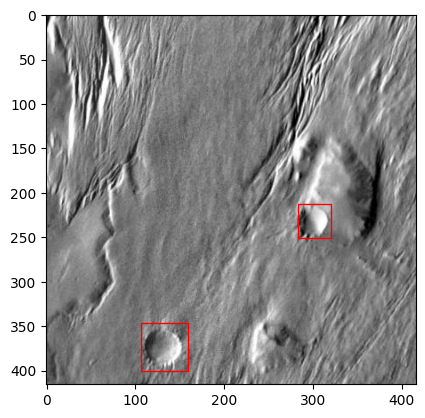

In [ ]:
show_im(images[180][:-4])